In [101]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [102]:
df= pd.read_csv('1589505302_05152020_updated_ski_data_-_updated_ski_data.csv')
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


In [103]:
df['fastEight'].fillna(0, inplace=True)
df['NightSkiing_ac'].fillna(0, inplace=True)
df['yearsOpen'][df['yearsOpen']==df['yearsOpen'].max()]=1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
df_above80= df[df['AdultWeekday']>80]

In [105]:
df_above80.isnull().sum()

Name                 0
Region               0
state                0
summit_elev          0
vertical_drop        0
base_elev            0
trams                0
fastEight            0
fastSixes            0
fastQuads            0
quad                 0
triple               0
double               0
surface              0
total_chairs         0
Runs                 0
TerrainParks         3
LongestRun_mi        0
SkiableTerrain_ac    0
Snow Making_ac       4
daysOpenLastYear     4
yearsOpen            0
averageSnowfall      0
AdultWeekday         0
AdultWeekend         1
projectedDaysOpen    6
NightSkiing_ac       0
dtype: int64

In [106]:
df_below80= df[(df['AdultWeekday']<=80)]

In [107]:
df['yearsOpen'].max()

104.0

In [108]:
df_below80.isnull().sum()

Name                  0
Region                0
state                 0
summit_elev           0
vertical_drop         0
base_elev             0
trams                 0
fastEight             0
fastSixes             0
fastQuads             0
quad                  0
triple                0
double                0
surface               0
total_chairs          0
Runs                  3
TerrainParks         39
LongestRun_mi         5
SkiableTerrain_ac     2
Snow Making_ac       31
daysOpenLastYear     39
yearsOpen             1
averageSnowfall      10
AdultWeekday          0
AdultWeekend          3
projectedDaysOpen    34
NightSkiing_ac        0
dtype: int64

In [109]:
df_miss= df[(df['AdultWeekday'].isnull())]

In [110]:
df_miss.isnull().sum()

Name                  0
Region                0
state                 0
summit_elev           0
vertical_drop         0
base_elev             0
trams                 0
fastEight             0
fastSixes             0
fastQuads             0
quad                  0
triple                0
double                0
surface               0
total_chairs          0
Runs                  1
TerrainParks          9
LongestRun_mi         0
SkiableTerrain_ac     1
Snow Making_ac       11
daysOpenLastYear      8
yearsOpen             0
averageSnowfall       4
AdultWeekday         54
AdultWeekend         47
projectedDaysOpen     7
NightSkiing_ac        0
dtype: int64

In [111]:
def impute_nan(data, variable):
    data[variable+'_median']= data[variable].fillna(data[variable].median())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    data[variable].plot(kind='kde', ax=ax)
    data[variable+'_median'].plot(kind='kde', ax=ax, color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

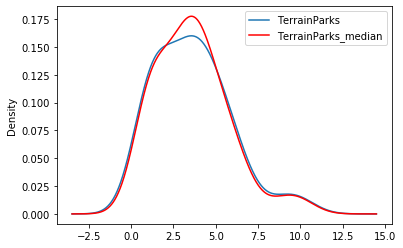

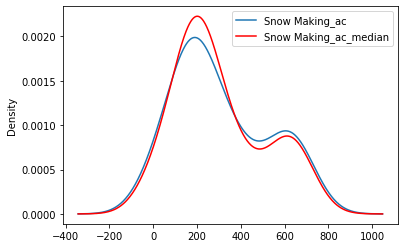

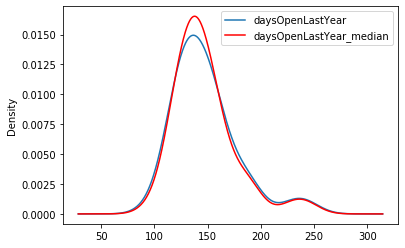

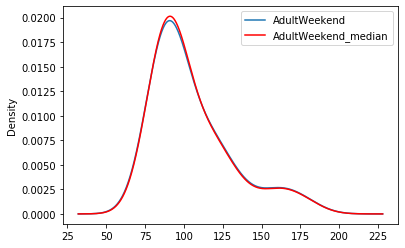

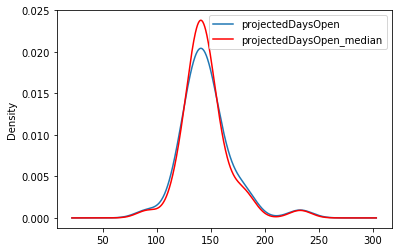

In [112]:
for i in df_above80.isnull().sum().index[(df_above80.isnull().sum().values>0)]:
    impute_nan(df_above80, i)
    
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

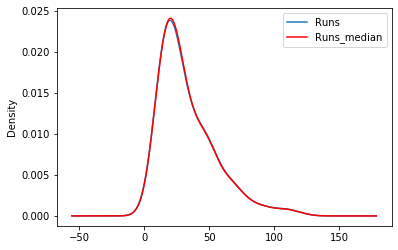

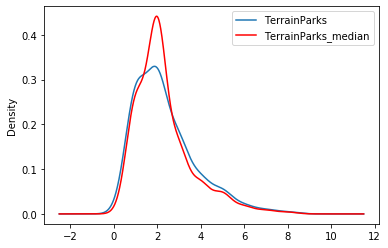

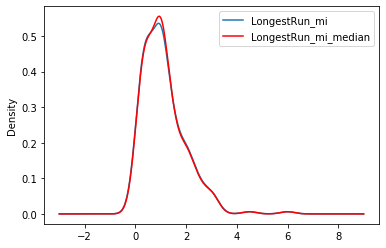

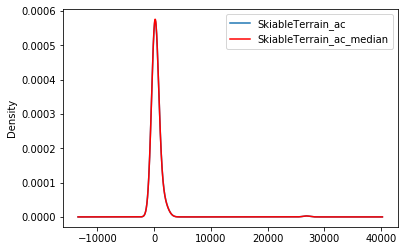

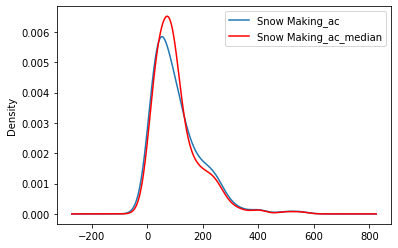

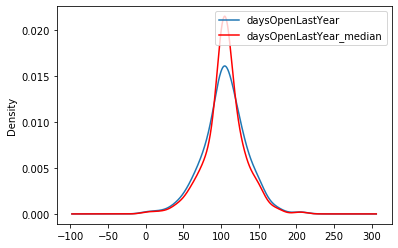

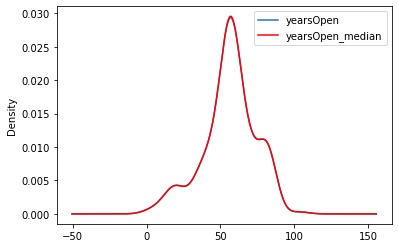

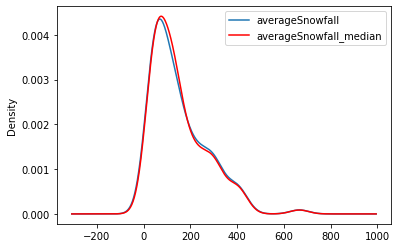

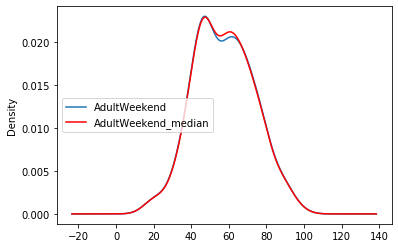

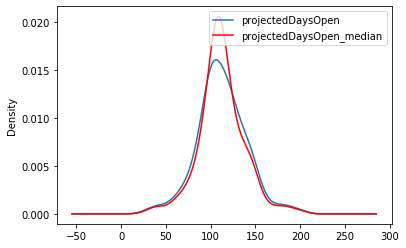

In [113]:
for i in df_below80.isnull().sum().index[(df_below80.isnull().sum().values>0)]:
    impute_nan(df_below80, i)

In [116]:
df.loc[df_above80.index,:]= df_above80

In [117]:
df.loc[df_below80.index,:]= df_below80

In [133]:
df.isnull().sum()

Name                         0
Region                       0
state                        0
summit_elev                  0
vertical_drop                0
base_elev                    0
trams                        0
fastEight                    0
fastSixes                    0
fastQuads                    0
quad                         0
triple                       0
double                       0
surface                      0
total_chairs                 0
Runs                         4
TerrainParks                51
LongestRun_mi                5
SkiableTerrain_ac            3
Snow Making_ac              46
daysOpenLastYear            51
yearsOpen                    1
averageSnowfall             14
AdultWeekday                54
AdultWeekend                51
projectedDaysOpen           47
NightSkiing_ac               0
Runs_median                  0
TerrainParks_median          0
LongestRun_mi_median         0
SkiableTerrain_ac_median     0
Snow Making_ac_median        0
daysOpen

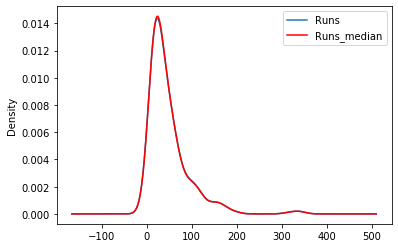

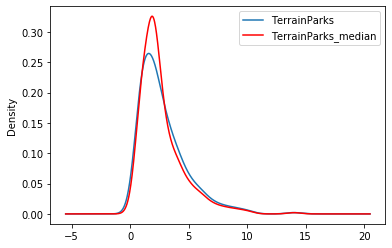

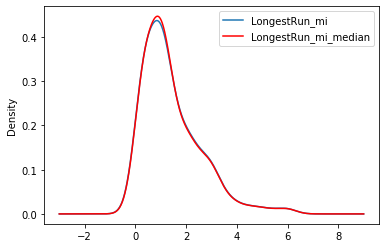

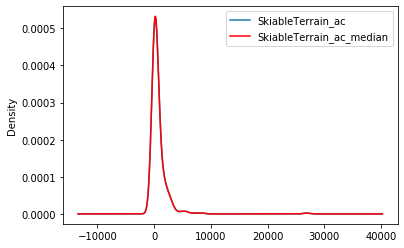

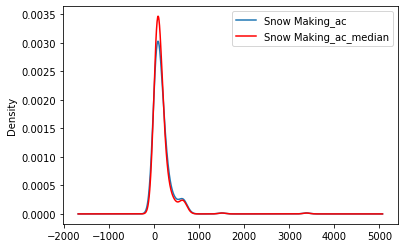

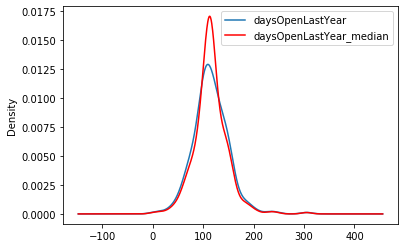

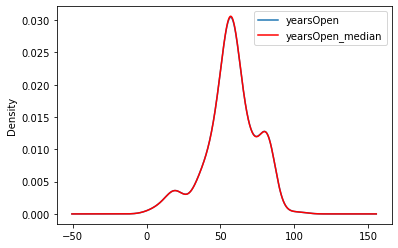

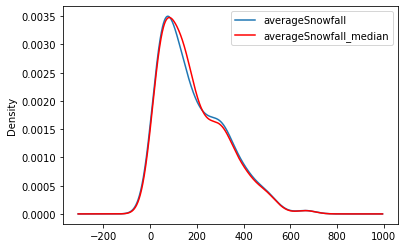

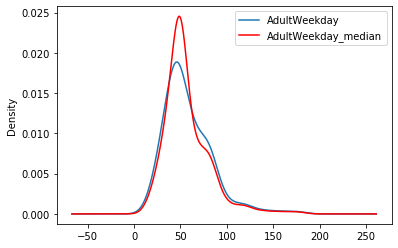

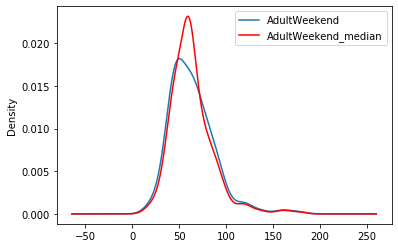

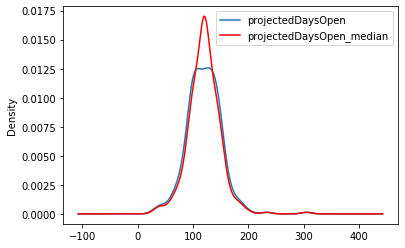

In [119]:
for i in df.isnull().sum().index[(df.isnull().sum().values>0)]:
    impute_nan(df, i)

In [135]:
df2= df.drop(df.isnull().sum()[(df.isnull().sum().values>0)].index, axis=1)

In [136]:
df2

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,TerrainParks_median,LongestRun_mi_median,SkiableTerrain_ac_median,Snow Making_ac_median,daysOpenLastYear_median,yearsOpen_median,averageSnowfall_median,AdultWeekday_median,AdultWeekend_median,projectedDaysOpen_median
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0.0,0,1,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,Wyoming,9500,1000,8500,0,0.0,0,0,...,1.0,1.5,300.0,100.0,114.0,9.0,150.0,50.0,60.0,120.0
326,Sleeping Giant Ski Resort,Wyoming,Wyoming,7428,810,6619,0,0.0,0,0,...,1.0,1.0,184.0,18.0,61.0,81.0,310.0,42.0,42.0,77.0
327,Snow King Resort,Wyoming,Wyoming,7808,1571,6237,0,0.0,0,0,...,2.0,1.0,400.0,250.0,121.0,80.0,300.0,59.0,59.0,123.0
328,Snowy Range Ski & Recreation Area,Wyoming,Wyoming,9663,990,8798,0,0.0,0,0,...,2.0,0.7,75.0,30.0,131.0,59.0,250.0,49.0,49.0,120.0


In [137]:
df2.isnull().sum()

Name                        0
Region                      0
state                       0
summit_elev                 0
vertical_drop               0
base_elev                   0
trams                       0
fastEight                   0
fastSixes                   0
fastQuads                   0
quad                        0
triple                      0
double                      0
surface                     0
total_chairs                0
NightSkiing_ac              0
Runs_median                 0
TerrainParks_median         0
LongestRun_mi_median        0
SkiableTerrain_ac_median    0
Snow Making_ac_median       0
daysOpenLastYear_median     0
yearsOpen_median            0
averageSnowfall_median      0
AdultWeekday_median         0
AdultWeekend_median         0
projectedDaysOpen_median    0
dtype: int64